# SETTING UP TO RUN PYTHON FILES ON COLAB

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from google.colab import drive
import sys

In [3]:
#Mount google drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
#Put the folder which contains all relevant code in system path
sys.path.insert(0,'/content/gdrive/MyDrive/ERAV2/S7') #Substitute your folders path over here

In [5]:
%cd /content/gdrive/MyDrive/ERAV2/S7
%pwd

/content/gdrive/MyDrive/ERAV2/S7


'/content/gdrive/MyDrive/ERAV2/S7'

# Start of actual code

#### The actual models are present in models_no.py and utility functions in utils.py. These are imported here.

In [6]:
import matplotlib.pyplot as plt

import torch
from torchvision import datasets
import torch.nn.functional as F
import torch.optim as optim

import model_1
import model_2
import model_3
import utils

**Set CUDA and Seed**

In [7]:
SEED = 1

cuda = torch.cuda.is_available()
device = torch.device("cuda" if cuda else "cpu")
print("Device", device)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

train_loader, test_loader = utils.get_data_loaders(batch_size=128)

Device cuda


**View sample of images to get an idea about dataset**

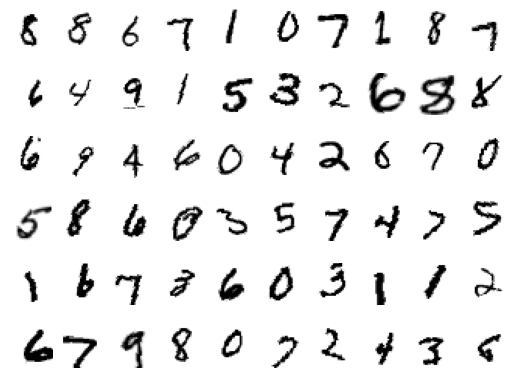

In [8]:
images, labels = next(iter(train_loader))

figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

## Check Model Summary and Run Model

### MODEL 1

#### Target

1. Create the overall model structure and data loaders
2. Keep param size < 20K
3. Set basic transformations in place
4. Add Batch normalization
5. Add Dropout

#### Results

1. Best training accuracy - 98.85 (15th Epoch)
2. Best test accuracy - 99.43 (15th Epoch)
3. No of parameters - 19560

#### Analysis

1. This is already looking like a good model
2. Model is underfitting
3. Better model than the one I created for session 6
4. Batch normalization, dropout and parameter size seem to produce good model
5. We'll next reduce model size and introduce GAP and scheduler

In [13]:
model = model_1.Net().to(device) #Call models.py to get the model
summary = utils.get_model_summary(model) #Get summary of the model that has been created
summary

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             144
              ReLU-2           [-1, 16, 26, 26]               0
       BatchNorm2d-3           [-1, 16, 26, 26]              32
           Dropout-4           [-1, 16, 26, 26]               0
            Conv2d-5           [-1, 20, 24, 24]           2,880
              ReLU-6           [-1, 20, 24, 24]               0
       BatchNorm2d-7           [-1, 20, 24, 24]              40
           Dropout-8           [-1, 20, 24, 24]               0
            Conv2d-9           [-1, 10, 24, 24]             200
        MaxPool2d-10           [-1, 10, 12, 12]               0
           Conv2d-11           [-1, 16, 10, 10]           1,440
             ReLU-12           [-1, 16, 10, 10]               0
      BatchNorm2d-13           [-1, 16, 10, 10]              32
          Dropout-14           [-1, 16,

In [14]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9) #For adjusting weights post error calculation
criterion = F.nll_loss

In [19]:
epochs = 15
train_losses = []
test_losses = []
train_acc = []
test_acc = []

for epoch in range(1,epochs+1):
    print(f'Epoch {epoch}')
    train_accuracy, train_loss = utils.train(model, device, train_loader, optimizer, criterion)
    train_losses.append(train_loss)
    train_acc.append(train_accuracy)
    test_accuracy, test_loss = utils.test(model, device, test_loader, criterion)
    test_acc.append(test_accuracy)
    test_losses.append(test_loss)

Epoch 1


Train: Loss=0.0435 Batch_id=468 Accuracy=92.89: 100%|██████████| 469/469 [00:25<00:00, 18.40it/s]


Test set: Average loss: 0.0485, Accuracy: 9844/10000 (98.44%)

Epoch 2


Train: Loss=0.0419 Batch_id=468 Accuracy=97.39: 100%|██████████| 469/469 [00:25<00:00, 18.25it/s]


Test set: Average loss: 0.0346, Accuracy: 9886/10000 (98.86%)

Epoch 3


Train: Loss=0.0598 Batch_id=468 Accuracy=97.96: 100%|██████████| 469/469 [00:25<00:00, 18.10it/s]


Test set: Average loss: 0.0336, Accuracy: 9893/10000 (98.93%)

Epoch 4


Train: Loss=0.0158 Batch_id=468 Accuracy=98.23: 100%|██████████| 469/469 [00:27<00:00, 17.00it/s]


Test set: Average loss: 0.0256, Accuracy: 9926/10000 (99.26%)

Epoch 5


Train: Loss=0.0203 Batch_id=468 Accuracy=98.30: 100%|██████████| 469/469 [00:26<00:00, 17.91it/s]


Test set: Average loss: 0.0287, Accuracy: 9910/10000 (99.10%)

Epoch 6


Train: Loss=0.0265 Batch_id=468 Accuracy=98.50: 100%|██████████| 469/469 [00:25<00:00, 18.06it/s]


Test set: Average loss: 0.0258, Accuracy: 9924/10000 (99.24%)

Epoch 7


Train: Loss=0.0379 Batch_id=468 Accuracy=98.49: 100%|██████████| 469/469 [00:26<00:00, 17.96it/s]


Test set: Average loss: 0.0208, Accuracy: 9931/10000 (99.31%)

Epoch 8


Train: Loss=0.0139 Batch_id=468 Accuracy=98.54: 100%|██████████| 469/469 [00:25<00:00, 18.11it/s]


Test set: Average loss: 0.0235, Accuracy: 9927/10000 (99.27%)

Epoch 9


Train: Loss=0.0386 Batch_id=468 Accuracy=98.63: 100%|██████████| 469/469 [00:26<00:00, 17.91it/s]


Test set: Average loss: 0.0199, Accuracy: 9935/10000 (99.35%)

Epoch 10


Train: Loss=0.0870 Batch_id=468 Accuracy=98.67: 100%|██████████| 469/469 [00:27<00:00, 16.81it/s]


Test set: Average loss: 0.0245, Accuracy: 9921/10000 (99.21%)

Epoch 11


Train: Loss=0.0049 Batch_id=468 Accuracy=98.75: 100%|██████████| 469/469 [00:26<00:00, 17.94it/s]


Test set: Average loss: 0.0214, Accuracy: 9931/10000 (99.31%)

Epoch 12


Train: Loss=0.0066 Batch_id=468 Accuracy=98.76: 100%|██████████| 469/469 [00:26<00:00, 17.81it/s]


Test set: Average loss: 0.0212, Accuracy: 9931/10000 (99.31%)

Epoch 13


Train: Loss=0.0696 Batch_id=468 Accuracy=98.76: 100%|██████████| 469/469 [00:26<00:00, 17.97it/s]


Test set: Average loss: 0.0241, Accuracy: 9913/10000 (99.13%)

Epoch 14


Train: Loss=0.0319 Batch_id=468 Accuracy=98.77: 100%|██████████| 469/469 [00:26<00:00, 17.89it/s]


Test set: Average loss: 0.0198, Accuracy: 9929/10000 (99.29%)

Epoch 15


Train: Loss=0.0139 Batch_id=468 Accuracy=98.85: 100%|██████████| 469/469 [00:27<00:00, 17.09it/s]


Test set: Average loss: 0.0184, Accuracy: 9943/10000 (99.43%)



### MODEL 2

#### Target

1. Add GAP and Scheduler
2. Keep param size ~ 10-12K

#### Results

1. Best training accuracy - 98.60 (13th Epoch)
2. Best test accuracy - 99.38 (last few epochs)
3. No of parameters - 11744

#### Analysis

1. This again turns out to be a pretty good model
2. Model is underfitting
3. Adding GAP and scheduler seems to be working well since the model continues to perform well inspite of a significant reduction in parameters
4. Let's try changing some transformations and see if we can push our accuracy further

In [10]:
model = model_2.Net().to(device) #Call models.py to get the model
summary = utils.get_model_summary(model) #Get summary of the model that has been created
summary

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             144
              ReLU-2           [-1, 16, 26, 26]               0
       BatchNorm2d-3           [-1, 16, 26, 26]              32
           Dropout-4           [-1, 16, 26, 26]               0
            Conv2d-5           [-1, 16, 24, 24]           2,304
              ReLU-6           [-1, 16, 24, 24]               0
       BatchNorm2d-7           [-1, 16, 24, 24]              32
           Dropout-8           [-1, 16, 24, 24]               0
            Conv2d-9            [-1, 8, 24, 24]             128
        MaxPool2d-10            [-1, 8, 12, 12]               0
           Conv2d-11            [-1, 8, 10, 10]             576
             ReLU-12            [-1, 8, 10, 10]               0
      BatchNorm2d-13            [-1, 8, 10, 10]              16
          Dropout-14            [-1, 8,

In [11]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9) #For adjusting weights post error calculation
criterion = F.nll_loss
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=6, gamma=0.1, verbose=True) #For updating learning rate of optimizer

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


In [12]:
epochs = 15
train_losses = []
test_losses = []
train_acc = []
test_acc = []

for epoch in range(1,epochs+1):
    print(f'Epoch {epoch}')
    train_accuracy, train_loss = utils.train(model, device, train_loader, optimizer, criterion)
    train_losses.append(train_loss)
    train_acc.append(train_accuracy)
    test_accuracy, test_loss = utils.test(model, device, test_loader, criterion)
    test_acc.append(test_accuracy)
    test_losses.append(test_loss)
    scheduler.step()

Epoch 1


Train: Loss=0.1199 Batch_id=468 Accuracy=85.56: 100%|██████████| 469/469 [00:27<00:00, 16.76it/s]


Test set: Average loss: 0.0600, Accuracy: 9836/10000 (98.36%)

Epoch 2


Train: Loss=0.2331 Batch_id=468 Accuracy=96.88: 100%|██████████| 469/469 [00:26<00:00, 18.00it/s]


Test set: Average loss: 0.0377, Accuracy: 9897/10000 (98.97%)

Epoch 3


Train: Loss=0.1278 Batch_id=468 Accuracy=97.48: 100%|██████████| 469/469 [00:26<00:00, 17.91it/s]


Test set: Average loss: 0.0377, Accuracy: 9875/10000 (98.75%)

Epoch 4


Train: Loss=0.0373 Batch_id=468 Accuracy=97.78: 100%|██████████| 469/469 [00:26<00:00, 17.91it/s]


Test set: Average loss: 0.0284, Accuracy: 9910/10000 (99.10%)

Epoch 5


Train: Loss=0.0476 Batch_id=468 Accuracy=98.02: 100%|██████████| 469/469 [00:26<00:00, 17.40it/s]


Test set: Average loss: 0.0281, Accuracy: 9907/10000 (99.07%)

Epoch 6


Train: Loss=0.0719 Batch_id=468 Accuracy=98.09: 100%|██████████| 469/469 [00:25<00:00, 18.12it/s]


Test set: Average loss: 0.0281, Accuracy: 9902/10000 (99.02%)

Epoch 7


Train: Loss=0.0963 Batch_id=468 Accuracy=98.36: 100%|██████████| 469/469 [00:27<00:00, 16.95it/s]


Test set: Average loss: 0.0215, Accuracy: 9937/10000 (99.37%)

Epoch 8


Train: Loss=0.0574 Batch_id=468 Accuracy=98.47: 100%|██████████| 469/469 [00:25<00:00, 18.11it/s]


Test set: Average loss: 0.0216, Accuracy: 9937/10000 (99.37%)

Epoch 9


Train: Loss=0.0167 Batch_id=468 Accuracy=98.46: 100%|██████████| 469/469 [00:26<00:00, 18.02it/s]


Test set: Average loss: 0.0211, Accuracy: 9936/10000 (99.36%)

Epoch 10


Train: Loss=0.0245 Batch_id=468 Accuracy=98.50: 100%|██████████| 469/469 [00:25<00:00, 18.04it/s]


Test set: Average loss: 0.0208, Accuracy: 9934/10000 (99.34%)

Epoch 11


Train: Loss=0.0260 Batch_id=468 Accuracy=98.46: 100%|██████████| 469/469 [00:26<00:00, 17.94it/s]


Test set: Average loss: 0.0209, Accuracy: 9938/10000 (99.38%)

Epoch 12


Train: Loss=0.0241 Batch_id=468 Accuracy=98.59: 100%|██████████| 469/469 [00:27<00:00, 16.99it/s]


Test set: Average loss: 0.0204, Accuracy: 9938/10000 (99.38%)

Epoch 13


Train: Loss=0.0630 Batch_id=468 Accuracy=98.60: 100%|██████████| 469/469 [00:26<00:00, 17.76it/s]


Test set: Average loss: 0.0204, Accuracy: 9937/10000 (99.37%)

Epoch 14


Train: Loss=0.0358 Batch_id=468 Accuracy=98.57: 100%|██████████| 469/469 [00:26<00:00, 17.73it/s]


Test set: Average loss: 0.0204, Accuracy: 9937/10000 (99.37%)

Epoch 15


Train: Loss=0.1115 Batch_id=468 Accuracy=98.56: 100%|██████████| 469/469 [00:26<00:00, 17.92it/s]


Test set: Average loss: 0.0205, Accuracy: 9938/10000 (99.38%)



### MODEL 3

#### Target

1. Add new transformations to give better training
2. Keep param size ~ 8K

#### Results

1. Best training accuracy - 97.52 (14th Epoch)
2. Best test accuracy - 99.25 (14th Epoch)
3. No of parameters - 7940

#### Analysis

1. Overall the model is performing well given that it has < 8K params
2. Model is highly underfitting
3. Clearly adding more transformations has made training tougher for the model. Hence we see lower training accuracy and more underfitting

In [9]:
model = model_3.Net().to(device) #Call models.py to get the model
summary = utils.get_model_summary(model) #Get summary of the model that has been created
summary

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             144
              ReLU-2           [-1, 16, 26, 26]               0
       BatchNorm2d-3           [-1, 16, 26, 26]              32
           Dropout-4           [-1, 16, 26, 26]               0
            Conv2d-5           [-1, 16, 24, 24]           2,304
              ReLU-6           [-1, 16, 24, 24]               0
       BatchNorm2d-7           [-1, 16, 24, 24]              32
           Dropout-8           [-1, 16, 24, 24]               0
            Conv2d-9            [-1, 8, 24, 24]             128
        MaxPool2d-10            [-1, 8, 12, 12]               0
           Conv2d-11            [-1, 8, 10, 10]             576
             ReLU-12            [-1, 8, 10, 10]               0
      BatchNorm2d-13            [-1, 8, 10, 10]              16
          Dropout-14            [-1, 8,

In [10]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9) #For adjusting weights post error calculation
criterion = F.nll_loss
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=6, gamma=0.1, verbose=True) #For updating learning rate of optimizer

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


In [11]:
epochs = 15
train_losses = []
test_losses = []
train_acc = []
test_acc = []

for epoch in range(1,epochs+1):
    print(f'Epoch {epoch}')
    train_accuracy, train_loss = utils.train(model, device, train_loader, optimizer, criterion)
    train_losses.append(train_loss)
    train_acc.append(train_accuracy)
    test_accuracy, test_loss = utils.test(model, device, test_loader, criterion)
    test_acc.append(test_accuracy)
    test_losses.append(test_loss)
    scheduler.step()

Epoch 1


Train: Loss=0.2845 Batch_id=468 Accuracy=76.79: 100%|██████████| 469/469 [00:44<00:00, 10.56it/s]


Test set: Average loss: 0.0904, Accuracy: 9751/10000 (97.51%)

Epoch 2


Train: Loss=0.2529 Batch_id=468 Accuracy=94.48: 100%|██████████| 469/469 [00:43<00:00, 10.82it/s]


Test set: Average loss: 0.0461, Accuracy: 9856/10000 (98.56%)

Epoch 3


Train: Loss=0.1273 Batch_id=468 Accuracy=95.67: 100%|██████████| 469/469 [00:43<00:00, 10.69it/s]


Test set: Average loss: 0.0395, Accuracy: 9880/10000 (98.80%)

Epoch 4


Train: Loss=0.0911 Batch_id=468 Accuracy=96.21: 100%|██████████| 469/469 [00:44<00:00, 10.47it/s]


Test set: Average loss: 0.0335, Accuracy: 9881/10000 (98.81%)

Epoch 5


Train: Loss=0.1541 Batch_id=468 Accuracy=96.60: 100%|██████████| 469/469 [00:43<00:00, 10.84it/s]


Test set: Average loss: 0.0302, Accuracy: 9897/10000 (98.97%)

Epoch 6


Train: Loss=0.0630 Batch_id=468 Accuracy=96.63: 100%|██████████| 469/469 [00:43<00:00, 10.88it/s]


Test set: Average loss: 0.0286, Accuracy: 9905/10000 (99.05%)

Epoch 7


Train: Loss=0.1098 Batch_id=468 Accuracy=97.28: 100%|██████████| 469/469 [00:44<00:00, 10.54it/s]


Test set: Average loss: 0.0241, Accuracy: 9923/10000 (99.23%)

Epoch 8


Train: Loss=0.0543 Batch_id=468 Accuracy=97.32: 100%|██████████| 469/469 [00:42<00:00, 11.03it/s]


Test set: Average loss: 0.0231, Accuracy: 9922/10000 (99.22%)

Epoch 9


Train: Loss=0.1103 Batch_id=468 Accuracy=97.49: 100%|██████████| 469/469 [00:43<00:00, 10.84it/s]


Test set: Average loss: 0.0233, Accuracy: 9918/10000 (99.18%)

Epoch 10


Train: Loss=0.1155 Batch_id=468 Accuracy=97.46: 100%|██████████| 469/469 [00:44<00:00, 10.52it/s]


Test set: Average loss: 0.0226, Accuracy: 9920/10000 (99.20%)

Epoch 11


Train: Loss=0.0671 Batch_id=468 Accuracy=97.31: 100%|██████████| 469/469 [00:42<00:00, 10.94it/s]


Test set: Average loss: 0.0228, Accuracy: 9923/10000 (99.23%)

Epoch 12


Train: Loss=0.0855 Batch_id=468 Accuracy=97.48: 100%|██████████| 469/469 [00:43<00:00, 10.87it/s]


Test set: Average loss: 0.0227, Accuracy: 9915/10000 (99.15%)

Epoch 13


Train: Loss=0.0446 Batch_id=468 Accuracy=97.46: 100%|██████████| 469/469 [00:44<00:00, 10.49it/s]


Test set: Average loss: 0.0223, Accuracy: 9921/10000 (99.21%)

Epoch 14


Train: Loss=0.1026 Batch_id=468 Accuracy=97.52: 100%|██████████| 469/469 [00:43<00:00, 10.80it/s]


Test set: Average loss: 0.0221, Accuracy: 9925/10000 (99.25%)

Epoch 15


Train: Loss=0.1127 Batch_id=468 Accuracy=97.47: 100%|██████████| 469/469 [00:43<00:00, 10.89it/s]


Test set: Average loss: 0.0232, Accuracy: 9913/10000 (99.13%)

